# 1. Data Overview & Preperation

In [1]:
import pandas as pd
import numpy as np
import matplotlib                  
import matplotlib.pyplot as plt
import seaborn as sns             
import geopandas as gpd            
plt.style.use('fivethirtyeight')
%matplotlib inline

import folium
import folium.plugins

import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

import warnings
warnings.filterwarnings("ignore")

### 1.1 Dataset overview

In [2]:
df_listing = pd.read_csv('/Users/wang/Desktop/AirbnbData/listings.csv')
df_listing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2023-02-19,2.31,1,128,59,City Registration Pending
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2017-08-06,0.66,1,365,0,NaN
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,2022-10-27,0.09,13,365,1,NaN
3,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,2019-06-28,0.17,2,365,0,STR-0000264
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,NaN,Mission,37.76030,-122.42197,Private room,110,1,770,2023-02-25,4.65,2,159,34,STR-0000028


In [3]:
df_listing.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [4]:
df_review = pd.read_csv('/Users/wang/Desktop/AirbnbData/reviews.csv')
df_review.head()

,listing_id,date
0,958,2009-07-23
1,958,2009-08-03
2,958,2009-09-27
3,958,2009-11-05
4,958,2010-02-13


In [5]:
df_listing.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [6]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6936 non-null   int64  
 1   name                            6936 non-null   object 
 2   host_id                         6936 non-null   int64  
 3   host_name                       6936 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6936 non-null   object 
 6   latitude                        6936 non-null   float64
 7   longitude                       6936 non-null   float64
 8   room_type                       6936 non-null   object 
 9   price                           6936 non-null   int64  
 10  minimum_nights                  6936 non-null   int64  
 11  number_of_reviews               6936 non-null   int64  
 12  last_review                     56

### 1.2 Missing values 

In [7]:
df_listing.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               6936
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1325
reviews_per_month                 1325
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           2758
dtype: int64

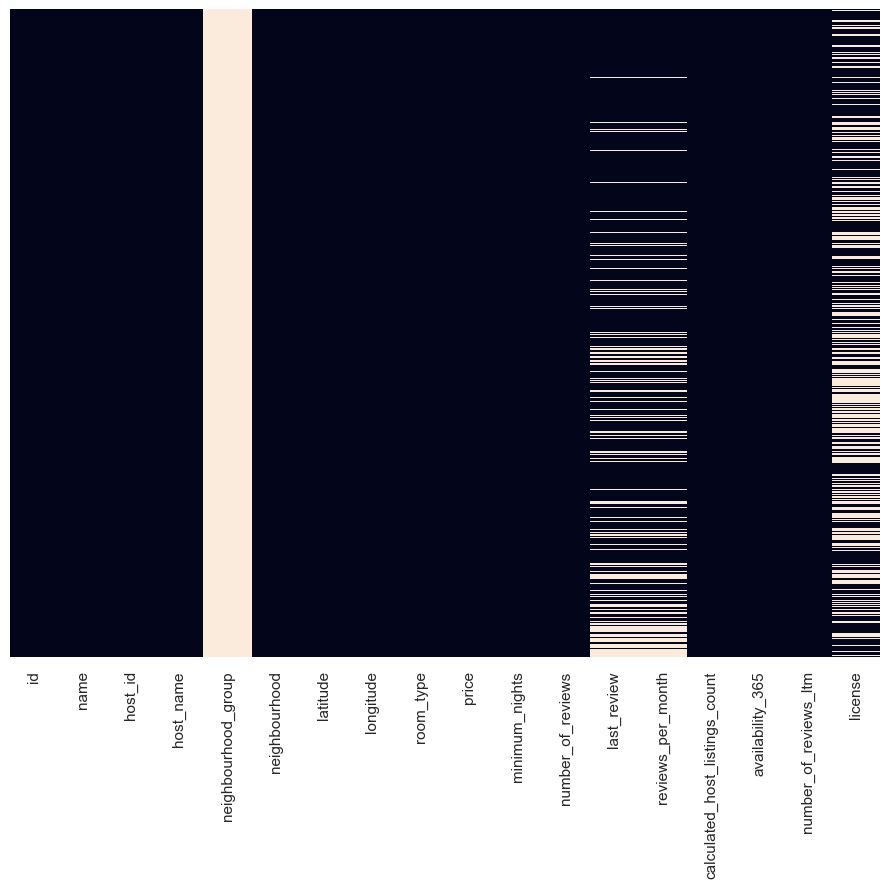

In [8]:
# visualization
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(df_listing.isnull(), yticklabels=False, cbar=False)
plt.show()

In [9]:
# delete the columns with too many missing values
df_listing = df_listing.drop(['neighbourhood_group', 'license'], axis = 1)

In [10]:
# fill other missing values
df_listing = df_listing.fillna(0)
df_listing

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,Western Addition,37.770280,-122.433170,Entire home/apt,202,2,383,2023-02-19,2.31,1,128,59
1,5858,Creative Sanctuary,8904,Philip And Tania,Bernal Heights,37.744740,-122.420890,Entire home/apt,235,30,111,2017-08-06,0.66,1,365,0
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,Haight Ashbury,37.765550,-122.452130,Private room,56,32,9,2022-10-27,0.09,13,365,1
3,8339,Historic Alamo Square Victorian,24215,Rosy,Western Addition,37.775640,-122.436420,Entire home/apt,575,9,28,2019-06-28,0.17,2,365,0
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,Mission,37.760300,-122.421970,Private room,110,1,770,2023-02-25,4.65,2,159,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,833400394714397974,New Condo w Rooftop Deck & A/C,1257432,San Francisco Life Real Estate,Mission,37.766606,-122.420657,Entire home/apt,179,30,0,0,0.00,28,316,0
6932,833522577729713929,Mission/Castro near Dolores Park,215787219,Janet,Castro/Upper Market,37.766876,-122.428904,Entire home/apt,143,30,0,0,0.00,1,147,0
6933,833620265884756491,Your home is waiting !,42213595,Emmanuel,Parkside,37.742326,-122.476288,Entire home/apt,253,1,0,0,0.00,2,263,0
6934,834204382399601571,Broadmoor Large Studio 245,502034331,David,Western Addition,37.787266,-122.423593,Private room,150,3,0,0,0.00,4,153,0


In [11]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6936 non-null   int64  
 1   name                            6936 non-null   object 
 2   host_id                         6936 non-null   int64  
 3   host_name                       6936 non-null   object 
 4   neighbourhood                   6936 non-null   object 
 5   latitude                        6936 non-null   float64
 6   longitude                       6936 non-null   float64
 7   room_type                       6936 non-null   object 
 8   price                           6936 non-null   int64  
 9   minimum_nights                  6936 non-null   int64  
 10  number_of_reviews               6936 non-null   int64  
 11  last_review                     6936 non-null   object 
 12  reviews_per_month               69

In [12]:
df_listing.shape

(6936, 16)

In [13]:
df_listing.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

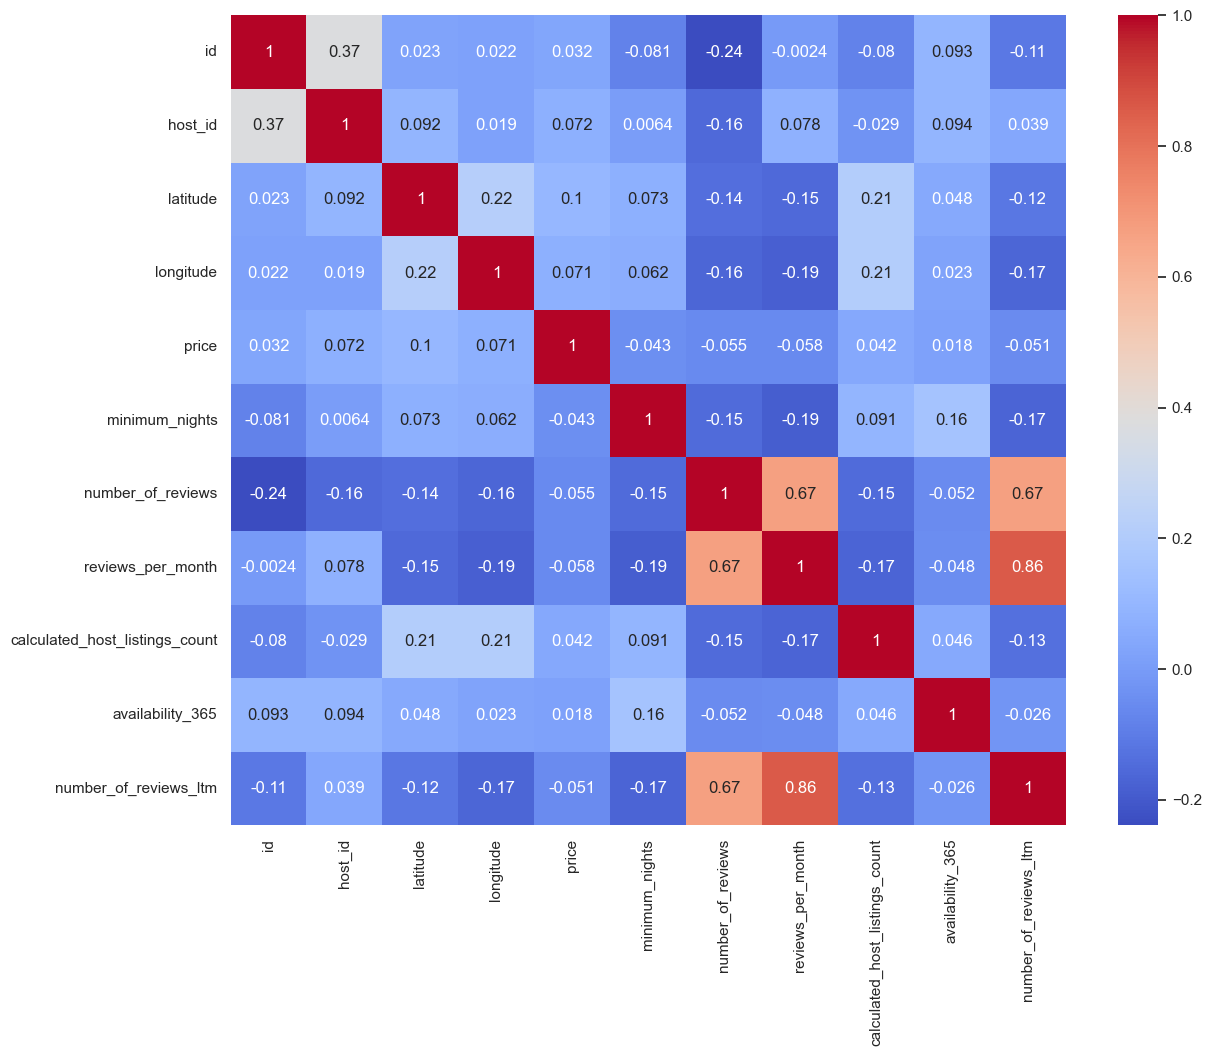

In [14]:
corr = df_listing.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### 1.3 EDA 

#### 1.3.1 Price

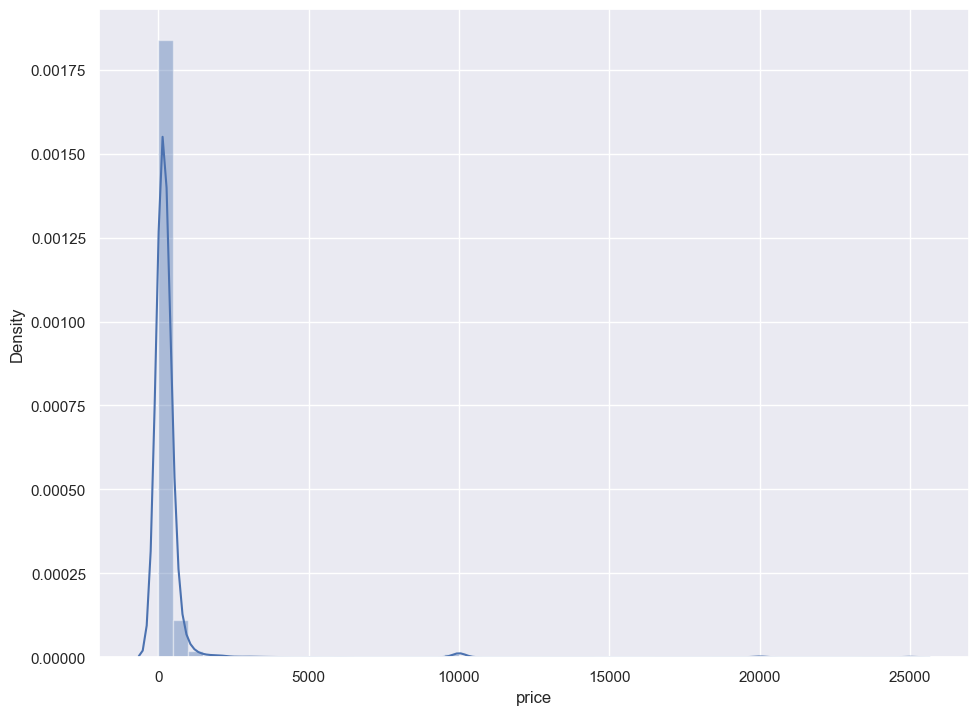

In [15]:
# price
sns.distplot(df_listing["price"])  # 直方图
plt.show()

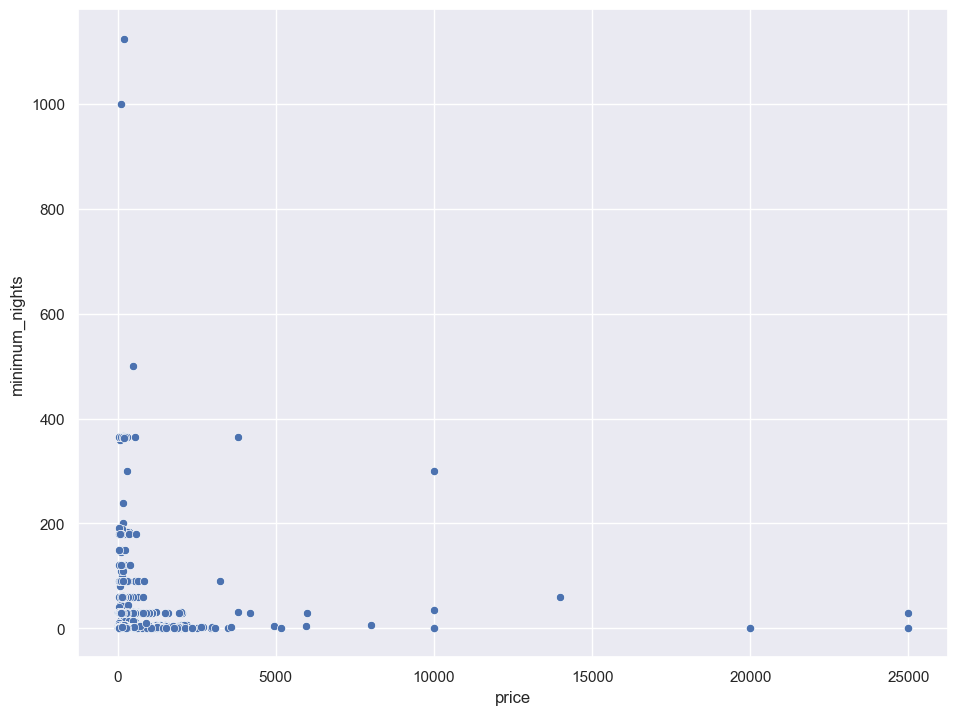

In [16]:
# relationship btw price and min_nights
sns.scatterplot(x="price", y="minimum_nights",data=df_listing)
plt.show()

#### 1.3.2 Neighborhood

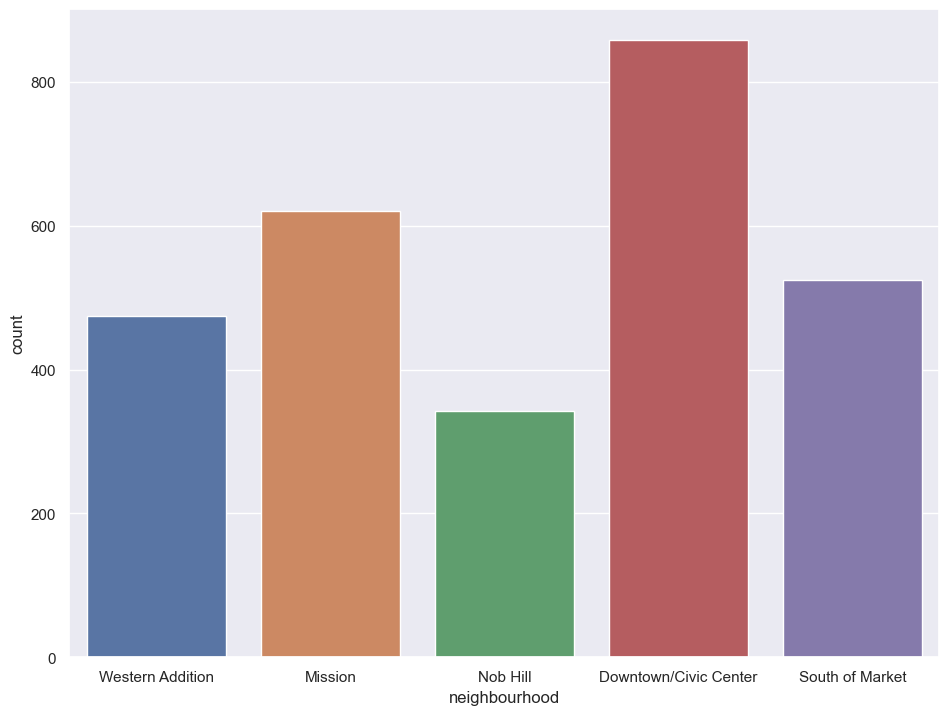

In [17]:
# neighborhood
top_neighbourhoods = df_listing["neighbourhood"].value_counts().head(5)
df_top_neighbourhoods = df_listing[df_listing["neighbourhood"].isin(top_neighbourhoods.index)]
sns.countplot(df_top_neighbourhoods["neighbourhood"])
plt.show()

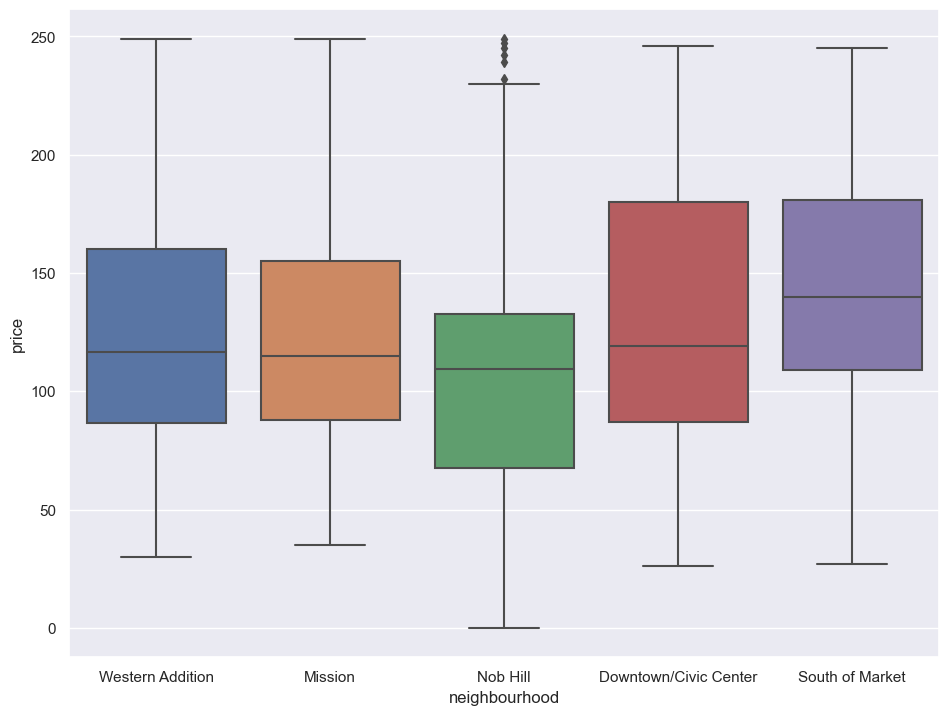

In [18]:
df_top_neighbourhoods_cheap = df_top_neighbourhoods[df_top_neighbourhoods.price < 250]   # 小于250房子较多
plt.figure()
sns.boxplot(x = 'neighbourhood', y = 'price', data=df_top_neighbourhoods_cheap)
plt.show()

#### 1.3.3 Room Type

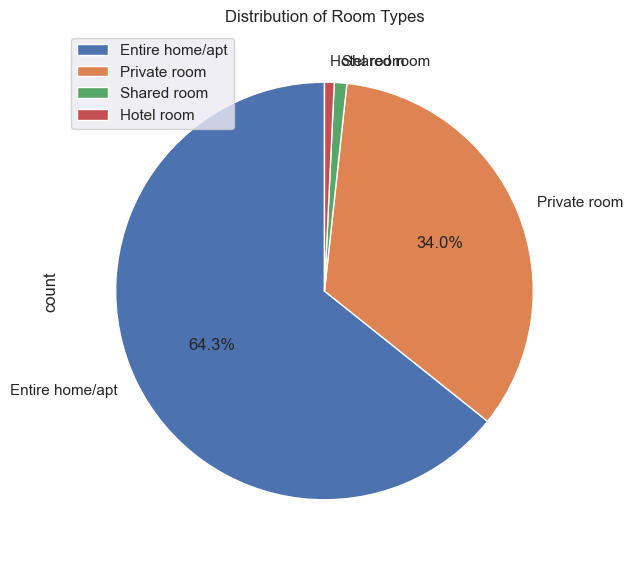

In [19]:
# room type
room_type_counts = df_listing['room_type'].value_counts()
pie_df = pd.DataFrame({'count': room_type_counts.values}, index=room_type_counts.index)
pie_df.plot(kind='pie', y='count', figsize=(6, 8), autopct=lambda x: '{:.1f}%'.format(x) if x >= 1 else '', startangle=90)
plt.title('Distribution of Room Types')
plt.show()

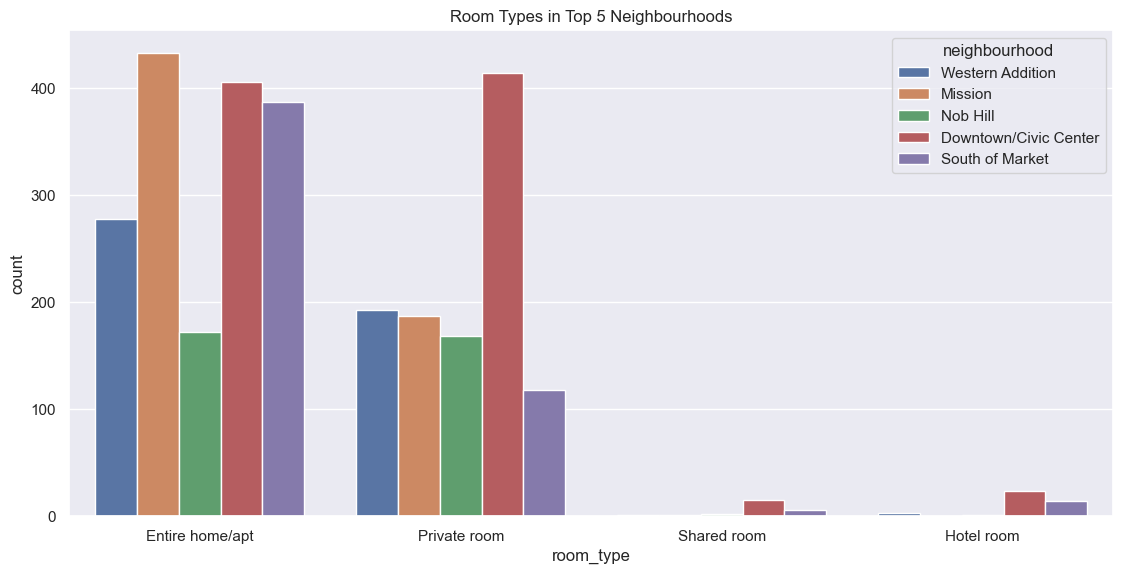

In [20]:
# room type in 5 top regions
plt.figure(figsize=(12,6))
sns.countplot(data = df_top_neighbourhoods, x="room_type", hue="neighbourhood")
plt.title("Room Types in Top 5 Neighbourhoods")
plt.show()

<Figure size 1000x800 with 0 Axes>

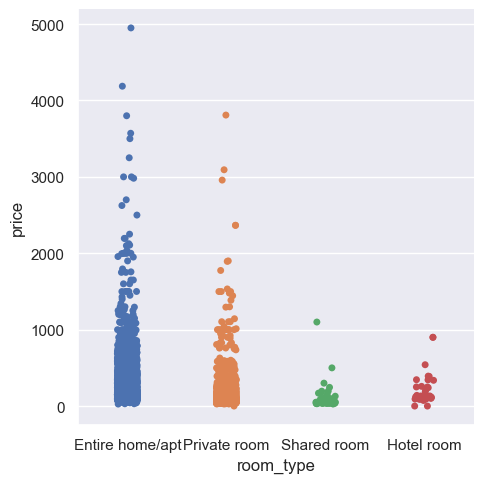

In [21]:
df_filtered = df_listing[df_listing['price'] <= 5000]
plt.figure()
sns.catplot(data=df_filtered, x="room_type", y="price")
plt.show()

#### 1.3.4 Reviews

### 1.4 Distribution on map

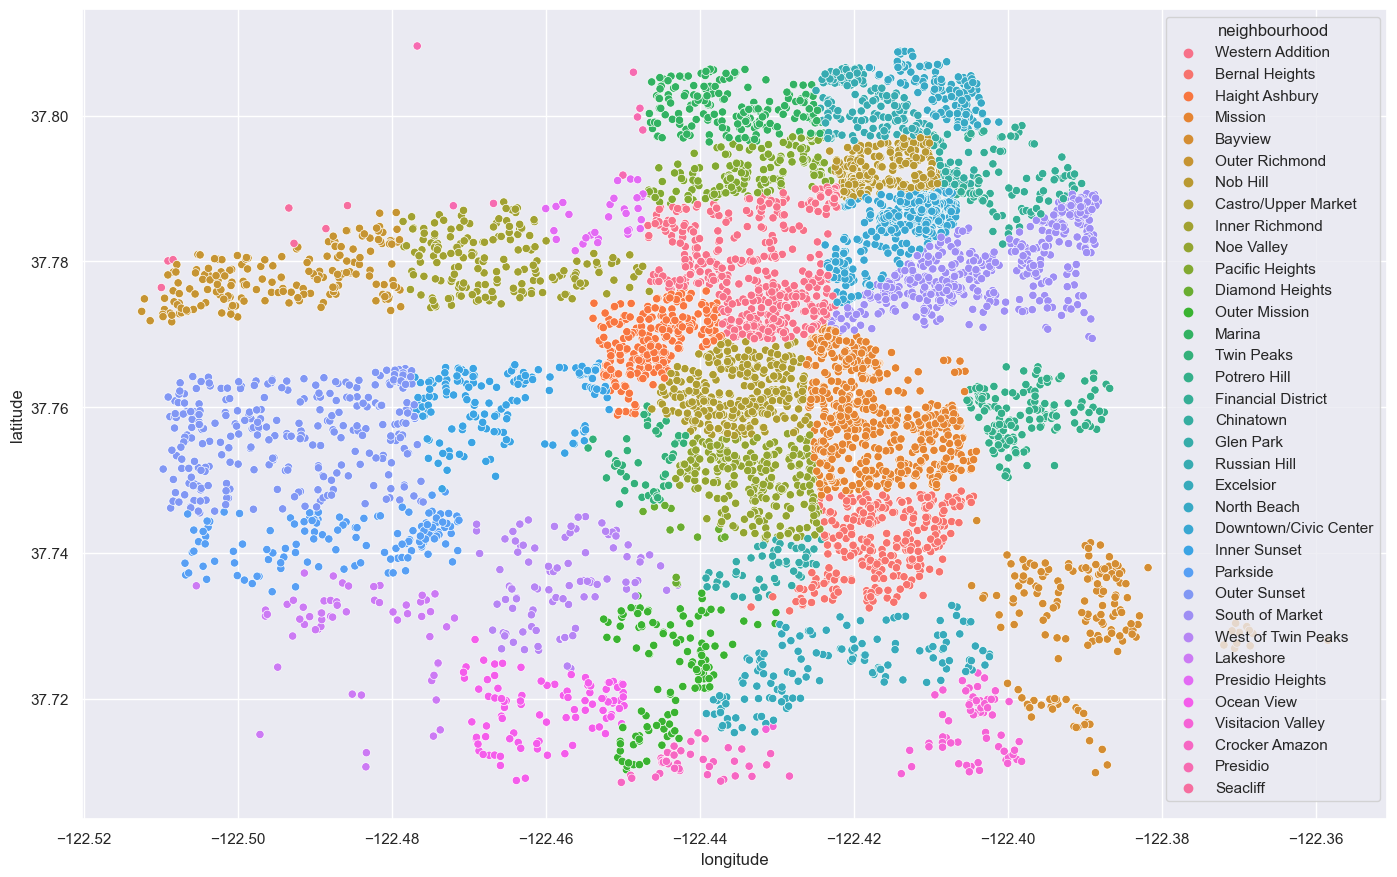

In [22]:
plt.figure(figsize=(15,10))
sns.scatterplot(df_listing.longitude, df_listing.latitude, hue=df_listing.neighbourhood)

plt.show()

In [23]:
# on the real world map
import folium
from folium.plugins import HeatMap
m = folium.Map(location=[37.7749, -122.4194], zoom_start=11)
HeatMap(df_listing[['latitude', 'longitude']].dropna(),
        radius=15,
        gradient={0.4: 'white', 0.6: 'yellow', 0.8: 'orange', 1.0: 'red'}).add_to(m)

display(m)

## 2. House Description Analysis

### 2.1 Wordcloud & Hotwords in SF

In [24]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
import string

stop_words = set(stopwords.words('english'))  # use NLTK's stopwords for English
names = [name.lower() for name in df_listing['name']]
names_count = []
for name in names:
    name = name.translate(str.maketrans('', '', string.punctuation))
    words = name.split()
    for word in words:
        if word not in stop_words:
            names_count.append(word)
result = Counter(names_count).most_common()

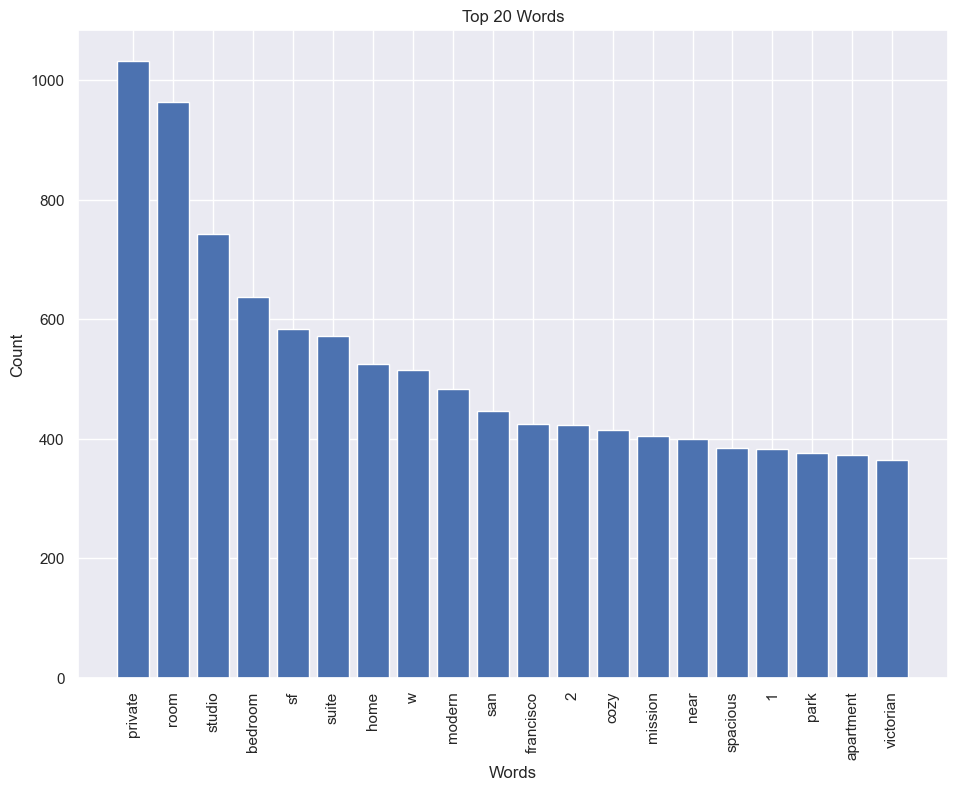

In [25]:
top_20 = result[0:20]
top_20_words = pd.DataFrame(top_20, columns=["words","count"])
words = [pair[0] for pair in top_20]
counts = [pair[1] for pair in top_20]
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 20 Words')
plt.show()

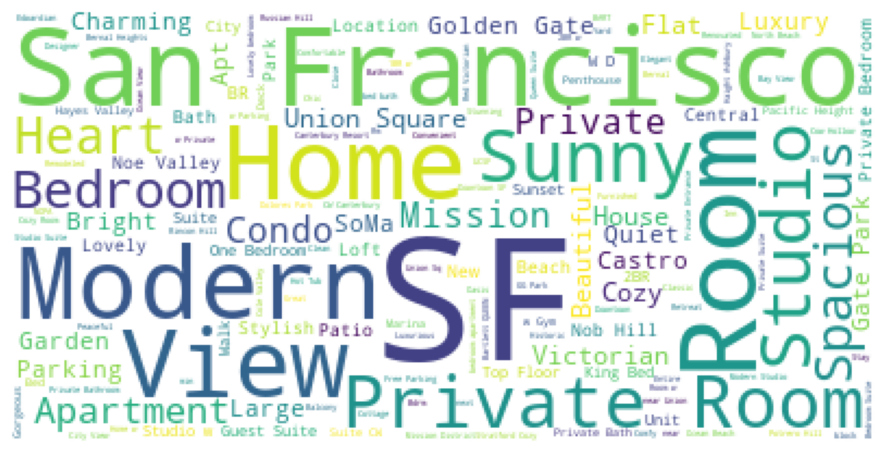

In [26]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df_listing.name)
wordcloud = WordCloud(max_words=200,background_color="white").generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### 2.2 Sentiment Analysis

In [27]:
from collections import defaultdict
from nltk.sentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

scores = defaultdict(int)
for word, count in result:
    score = analyzer.polarity_scores(word)
    scores['positive'] += score['pos'] * count
    scores['negative'] += score['neg'] * count
    scores['neutral'] += score['neu'] * count
scores

defaultdict(int, {'positive': 3388.0, 'negative': 140.0, 'neutral': 33769.0})

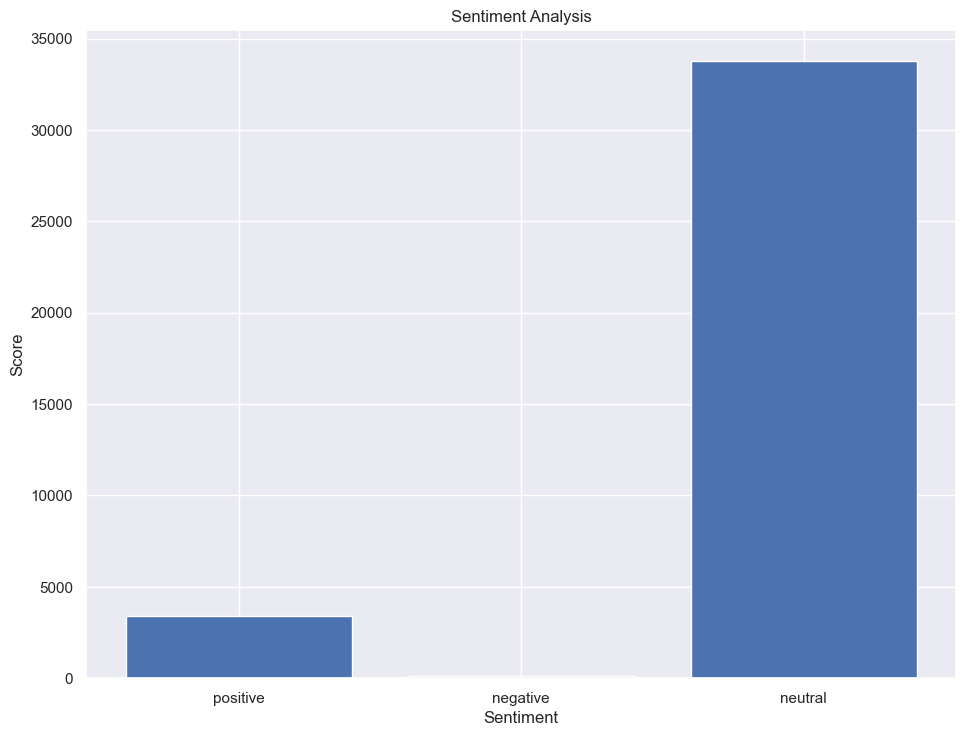

In [28]:
labels = ['positive', 'negative', 'neutral']
scores_list = [scores['positive'], scores['negative'], scores['neutral']]

plt.bar(labels, scores_list)
plt.xlabel('Sentiment')
plt.ylabel('Score')
plt.title('Sentiment Analysis')
plt.show()

In [29]:
scores_by_word = {}
for word, count in result:
    scores_by_word[word] = analyzer.polarity_scores(word)['compound']
sorted_words_by_score = sorted(scores_by_word.items(), key=lambda x: x[1], reverse=True)

top_50_positive_words = [word for word, score in sorted_words_by_score if score > 0][:50]

print("Top 50 positive words:")
print(top_50_positive_words)

Top 50 positive words:
['best', 'paradise', 'perfectly', 'love', 'great', 'awesome', 'masterpiece', 'superb', 'excellence', 'gorgeous', 'outstanding', 'heavenly', 'beautiful', 'super', 'delight', 'marvelous', 'loving', 'loved', 'magnificent', 'joyful', 'blissful', 'charming', 'lovely', 'amazing', 'beauty', 'delightful', 'darling', 'brilliant', 'wd', 'perfect', 'wonderful', 'beautifully', 'excellent', 'happy', 'bliss', 'inspire', 'fantastic', 'sophisticated', 'gracious', 'cheerful', 'superior', 'peace', 'bonus', 'beauteous', 'heartfelt', 'award', 'vibrant', 'fabulous', 'ideal', 'liberty']


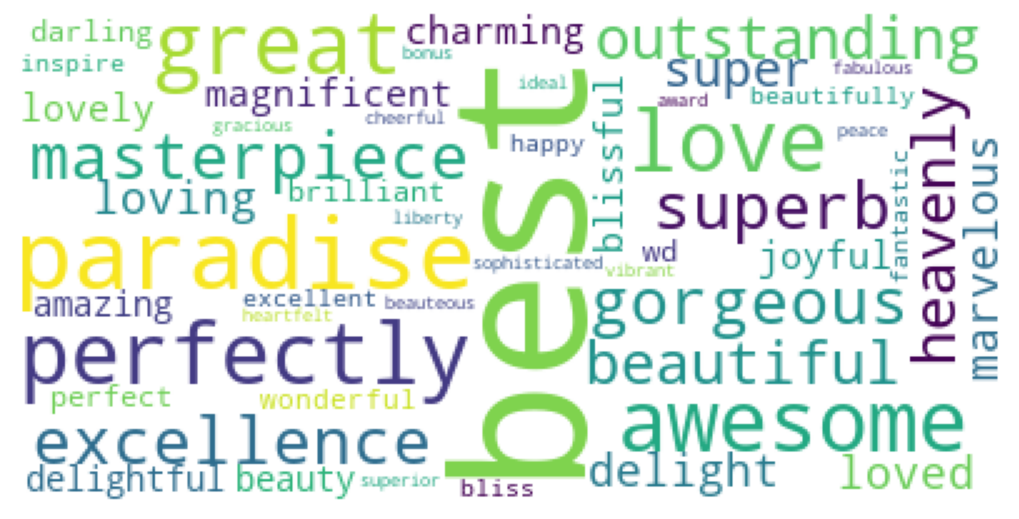

In [30]:
words_str = " ".join(top_50_positive_words)
wordcloud = WordCloud(background_color="white").generate(words_str)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### 2.3 Hotwords by part of speech

In [31]:
import nltk
from collections import defaultdict
from nltk.corpus import stopwords
import string
import pandas as pd

stop_words = set(stopwords.words('english')) | set(['w'])
names = [name.lower() for name in df_listing['name']]
names_count = []
for name in names:
    name = name.translate(str.maketrans('', '', string.punctuation))
    words = name.split()
    for word in words:
        if word not in stop_words:
            names_count.append(word)

tagged_words = nltk.pos_tag(names_count)

pos_dict = defaultdict(lambda: defaultdict(int))
for word, pos in tagged_words:
    pos_dict[pos][word] += 1

top_words = pd.DataFrame(columns=['POS', 'Word', 'Count'])
for pos, words in pos_dict.items():
    sorted_words = sorted(words.items(), key=lambda x: x[1], reverse=True)
    for i in range(min(len(sorted_words), 20)):
        word, count = sorted_words[i]
        if count > 10:
            top_words = top_words.append({'POS': pos, 'Word': word, 'Count': count}, ignore_index=True)

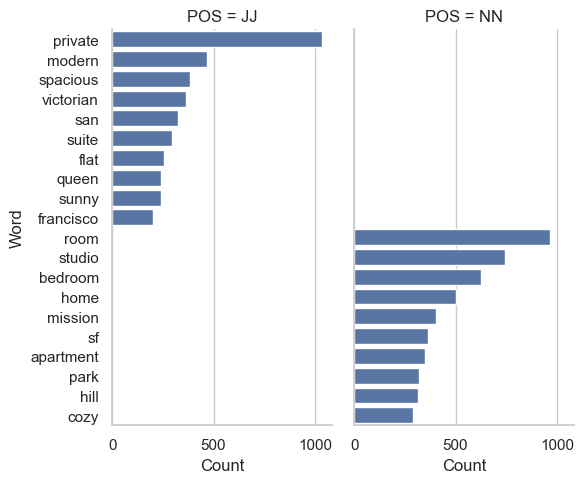

In [32]:
pos_list = ['NN', 'JJ']
top_n = 10
df_top_words = top_words[top_words['POS'].isin(pos_list)].groupby('POS').head(top_n)
sns.set_style('whitegrid')
sns.catplot(x='Count', y='Word', col='POS', data=df_top_words, kind='bar', color='b', aspect=.6)

### 3. SuperHosts

In [33]:
# to be continued
# April 25, 2023